# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | college
Processing Record 2 of Set 1 | hilton head island
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | kristinestad
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | borodulikha
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | al bardiyah
Processing Record 10 of Set 1 | midvagur
Processing Record 11 of Set 1 | xining
Processing Record 12 of Set 1 | kuching
Processing Record 13 of Set 1 | aripuana
Processing Record 14 of Set 1 | tostedt
Processing Record 15 of Set 1 | nyurba
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | cedeira
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | ivdel'
Processing Record 21 of Set 1 | callao
Processing Record 22 of Set 1 | h

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,college,64.8569,-147.8028,-13.01,82,40,2.57,US,1730083742
1,hilton head island,32.2163,-80.7526,18.88,70,100,5.66,US,1730083743
2,margaret river,-33.9500,115.0667,20.94,48,0,2.88,AU,1730083744
3,kristinestad,62.2743,21.3760,8.06,76,2,5.69,FI,1730083746
4,borodulikha,50.7184,80.9295,8.58,77,100,6.86,KZ,1730083748


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,-13.01,82,40,2.57,US,1730083742
1,hilton head island,32.2163,-80.7526,18.88,70,100,5.66,US,1730083743
2,margaret river,-33.9500,115.0667,20.94,48,0,2.88,AU,1730083744
3,kristinestad,62.2743,21.3760,8.06,76,2,5.69,FI,1730083746
4,borodulikha,50.7184,80.9295,8.58,77,100,6.86,KZ,1730083748


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

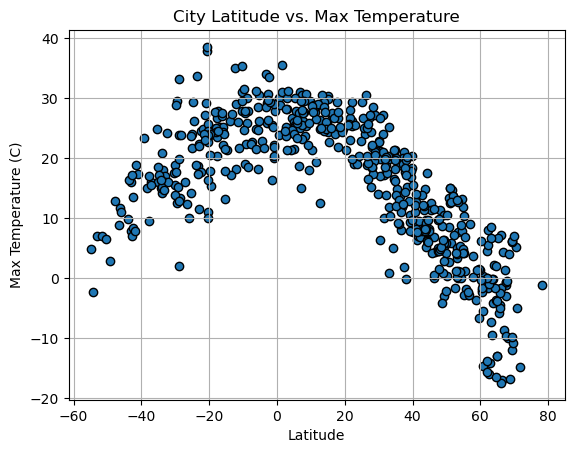

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

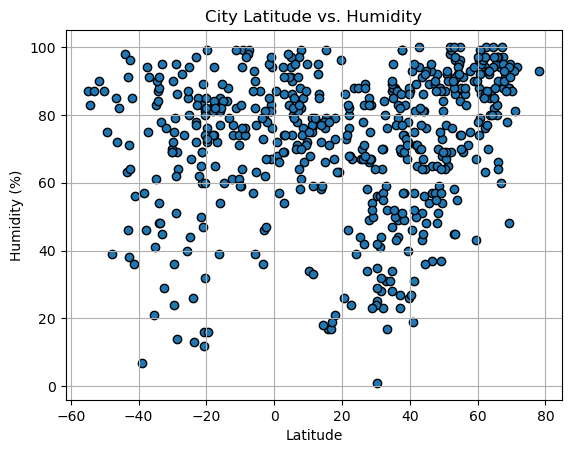

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

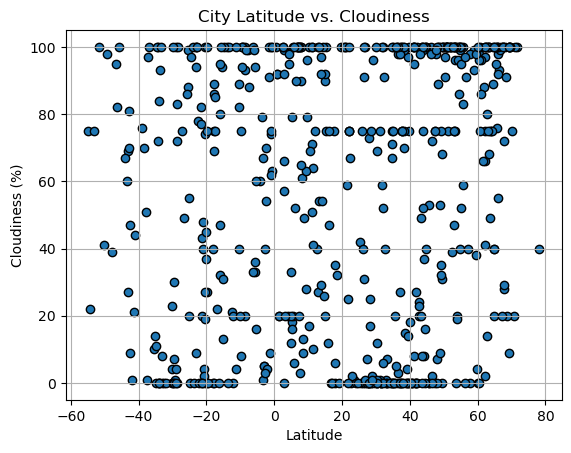

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

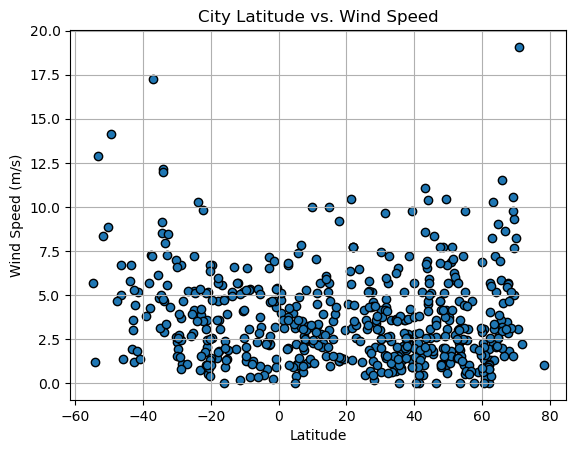

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, title, xlabel, ylabel,xannotation,yannotation):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(xannotation,yannotation),fontsize=15,color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f"The r^2-value is: {rvalue**2}")
    plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,-13.01,82,40,2.57,US,1730083742
1,hilton head island,32.2163,-80.7526,18.88,70,100,5.66,US,1730083743
3,kristinestad,62.2743,21.3760,8.06,76,2,5.69,FI,1730083746
4,borodulikha,50.7184,80.9295,8.58,77,100,6.86,KZ,1730083748
5,albany,42.6001,-73.9662,7.23,70,24,0.45,US,1730083448


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,margaret river,-33.9500,115.0667,20.94,48,0,2.88,AU,1730083744
6,blackmans bay,-43.0167,147.3167,15.96,46,69,3.58,AU,1730083750
11,aripuana,-9.1667,-60.6333,22.42,99,100,1.26,BR,1730083756
14,port-aux-francais,-49.3500,70.2167,2.80,75,98,14.16,TF,1730083759
15,port alfred,-33.5906,26.8910,18.08,48,93,7.93,ZA,1730083760


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7825989273268665


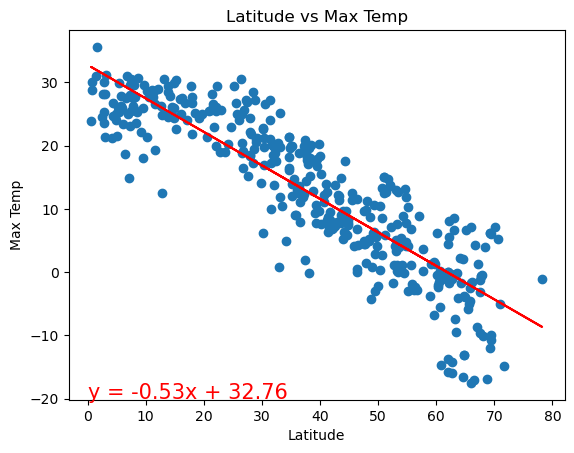

In [25]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],"Latitude vs Max Temp","Latitude","Max Temp",0,-20)

The r^2-value is: 0.46431889676577


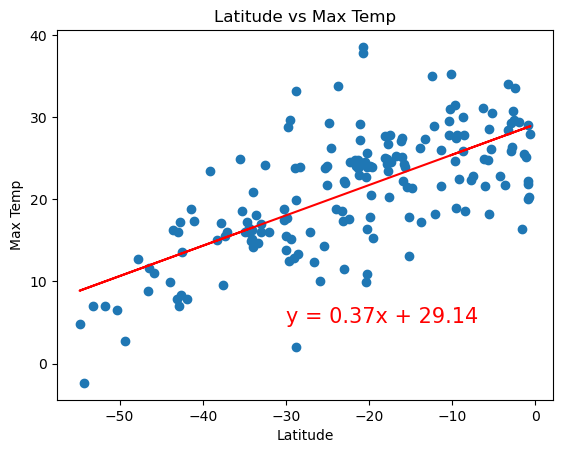

In [26]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],"Latitude vs Max Temp","Latitude","Max Temp",-30,5)

**Discussion about the linear relationship:** The linear regression model on Latitude vs Max Temp is a good fit as the proportion of variance in the Max Temp is explained well by the Latitude due to the R^2 value being around 0.4-0.8. Also, the Max Temp decreases as Latitude increases in the Northern Hemisphere, but Max Temp increases as Latitude increases in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0567357010842246


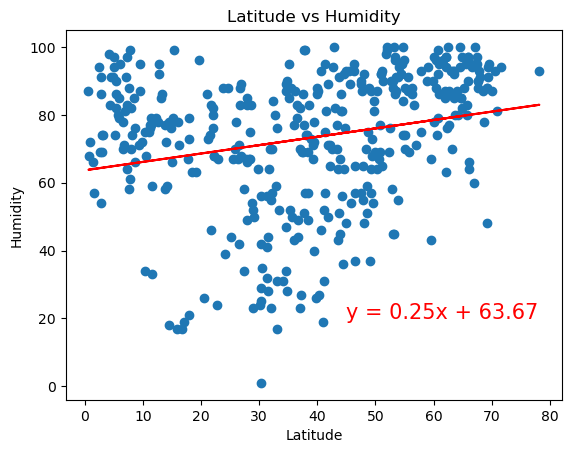

In [29]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],"Latitude vs Humidity","Latitude","Humidity",45,20)

The r^2-value is: 0.014867591190625284


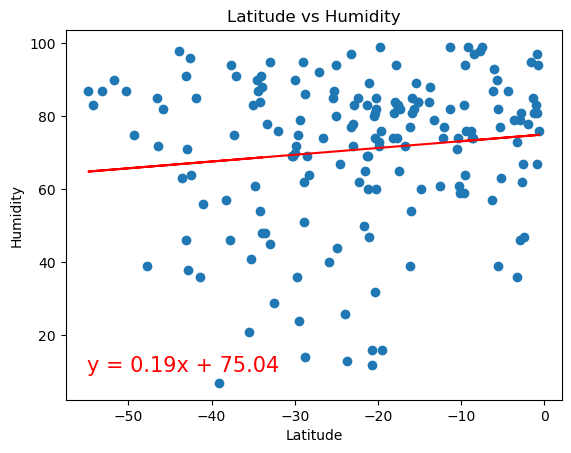

In [30]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],"Latitude vs Humidity","Latitude","Humidity",-55,10)

**Discussion about the linear relationship:** The linear regression model on Latitude vs Humidity is not a good fit as the proportion of variance in the Humidity is not explained well by the Latitude due to the R^2 value being around 0.0001-0.06. Also, the Humidity increases as Latitude increases in the Northern Hemisphere, but Humidity decreases as Latitude increases in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.033570490747565386


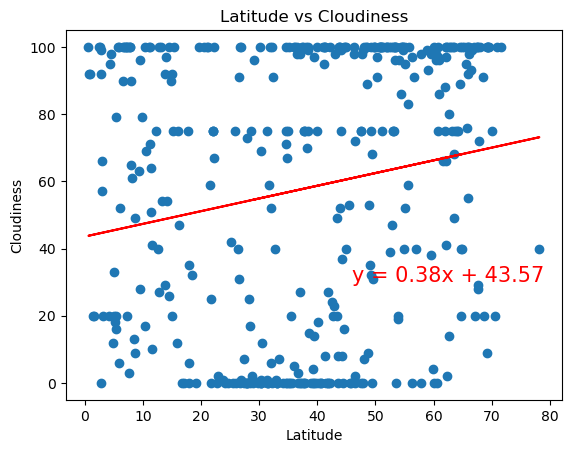

In [33]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],"Latitude vs Cloudiness","Latitude","Cloudiness",46,30)

The r^2-value is: 0.004282573249600003


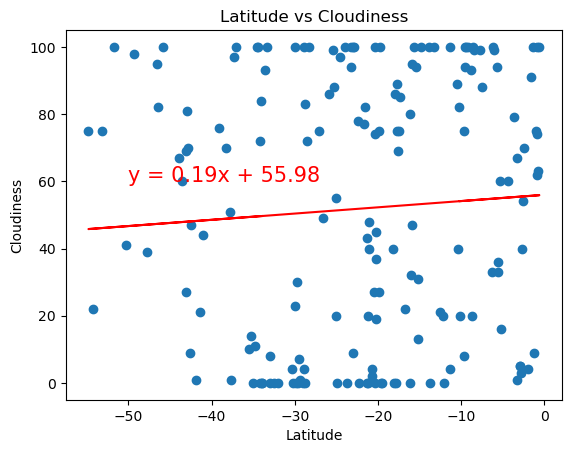

In [34]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],"Latitude vs Cloudiness","Latitude","Cloudiness",-50,60)

**Discussion about the linear relationship:**  The linear regression model on Latitude vs Cloudiness is not a good fit as the proportion of variance in the Cloudiness is not explained well by the Latitude due to the R^2 value being around 0.001-0.04. Also, the Cloudiness increases as Latitude increases in both the Northern and Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0046944142293156976


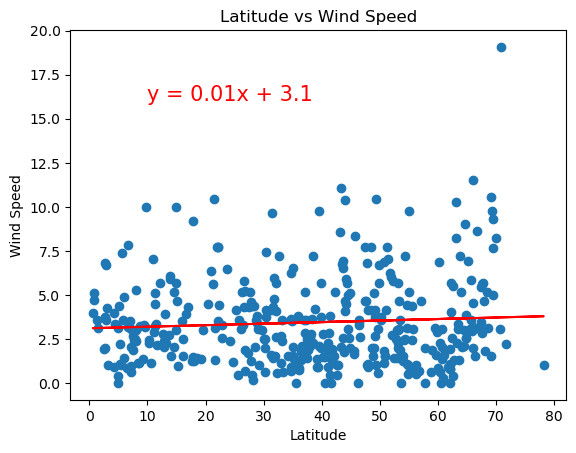

In [37]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],"Latitude vs Wind Speed","Latitude","Wind Speed",10,16)

The r^2-value is: 0.11136112441811107


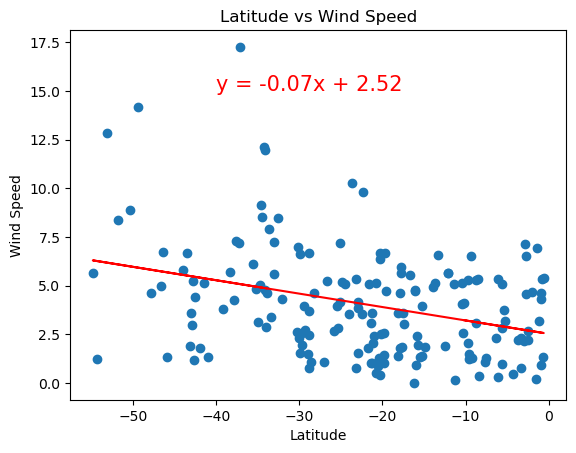

In [38]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],"Latitude vs Wind Speed","Latitude","Wind Speed",-40,15)

**Discussion about the linear relationship:** The linear regression model on Latitude vs Wind Speed is not a good fit as the proportion of variance in the Wind Speed is not explained well by the Latitude due to the R^2 value being around 0.001-0.2. Also, the Wind Speed increases as Latitude increases in the Northern Hemisphere, but Wind Speed decreases as Latitude increases in the Southern Hemisphere.